In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/processed/train_FD001_features.csv')
df.head()

,unit_number,time_cycles,sensor_4_mean_5,sensor_11_mean_5,sensor_15_mean_5,sensor_21_mean_5,sensor_17_mean_5,sensor_20_mean_5,sensor_3_mean_5,sensor_2_mean_5,...,sensor_13_mean_5,sensor_3,sensor_8,sensor_13,sensor_9_mean_5,sensor_9,sensor_14_mean_5,sensor_14,sensor_14_std_5,RUL
0,1,1,1400.600000,47.470,8.419500,23.419000,392.000000,39.060000,1589.700000,641.820000,...,2388.020,1589.70,2388.06,2388.02,9046.190000,9046.19,8138.620000,8138.62,0.000000,120
1,1,2,1401.870000,47.480,8.425650,23.421300,392.000000,39.030000,1590.760000,641.985000,...,2388.045,1591.82,2388.04,2388.07,9045.130000,9044.07,8135.055000,8131.49,5.041671,120
2,1,3,1402.646667,47.410,8.423033,23.395600,391.333333,39.003333,1589.836667,642.106667,...,2388.040,1587.99,2388.08,2388.03,9047.733333,9052.94,8134.446667,8133.23,3.717450,120
3,1,4,1402.452500,47.340,8.409325,23.390175,391.500000,38.972500,1588.075000,642.167500,...,2388.050,1582.79,2388.11,2388.08,9048.170000,9049.48,8134.292500,8133.83,3.050906,120
4,1,5,1403.206000,47.328,8.413340,23.393020,391.800000,38.958000,1587.030000,642.208000,...,2388.048,1582.85,2388.06,2388.04,9049.566000,9055.15,8134.194000,8133.80,2.651326,120


In [3]:
units = df['unit_number'].unique()

train_units, test_units = train_test_split(units, test_size=0.2, random_state=42)

train_df = df[df['unit_number'].isin(train_units)]
test_df  = df[df['unit_number'].isin(test_units)]

In [4]:
scaler = StandardScaler()

X_train = train_df.drop(columns=['unit_number','time_cycles','RUL'])
X_train_scaled = scaler.fit_transform(X_train)
y_train = train_df['RUL']

X_test = test_df.drop(columns=['unit_number','time_cycles','RUL'])
X_test_scaled  = scaler.transform(X_test)
y_test = test_df['RUL']

print(X_train.shape, X_test.shape)

(16561, 29) (4070, 29)


Baseline metrics
RMSE: 39.919400484650964
MAE: 35.25728054440089
R2: -0.00022999362190279093


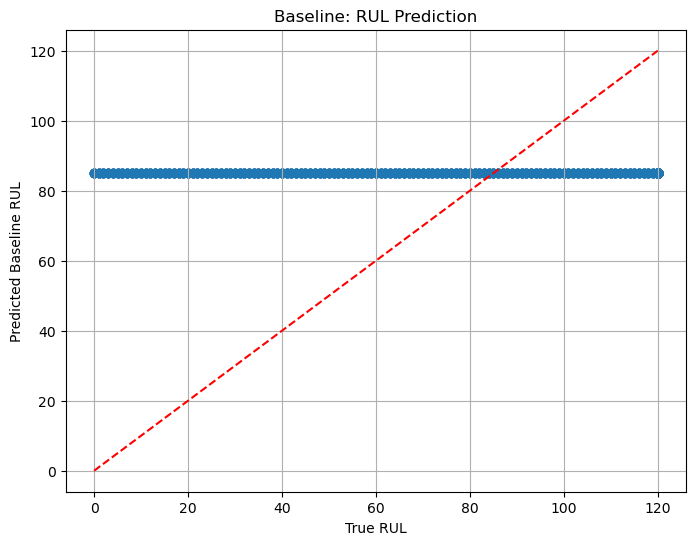

In [5]:
# Baseline

y_baseline_pred = np.full_like(y_test, fill_value=y_train.mean(), dtype=float)

rmse_baseline = np.sqrt(mean_squared_error(y_test, y_baseline_pred))
mae_baseline = mean_absolute_error(y_test, y_baseline_pred)
r2_baseline = r2_score(y_test, y_baseline_pred)

print("Baseline metrics")
print("RMSE:", rmse_baseline)
print("MAE:", mae_baseline)
print("R2:", r2_baseline)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_baseline_pred, alpha=0.3)
plt.plot([0,max(y_test)], [0,max(y_test)], 'r--')
plt.xlabel('True RUL')
plt.ylabel('Predicted Baseline RUL')
plt.title('Baseline: RUL Prediction')
plt.grid()
plt.show()
plt.close()

Linear Regression Metrics
RMSE: 19.00343158229487
MAE: 15.39267634634452
R2: 0.7733290232842651


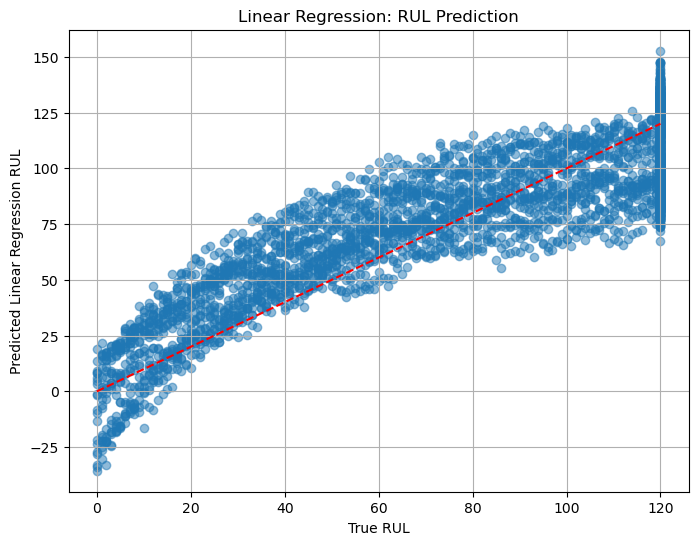

In [6]:
# Linear regression

lr = LinearRegression()

lr.fit(X_train_scaled, y_train)
y_lr_pred = lr.predict(X_test_scaled)

rmse_lr = np.sqrt(mean_squared_error(y_test, y_lr_pred))
mae_lr = mean_absolute_error(y_test, y_lr_pred)
r2_lr = r2_score(y_test, y_lr_pred)

print("Linear Regression Metrics")
print("RMSE:", rmse_lr)
print("MAE:", mae_lr)
print("R2:", r2_lr)

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_lr_pred, alpha=0.5)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--')
plt.xlabel('True RUL')
plt.ylabel('Predicted Linear Regression RUL')
plt.title('Linear Regression: RUL Prediction')
plt.grid()
plt.show()
plt.close()

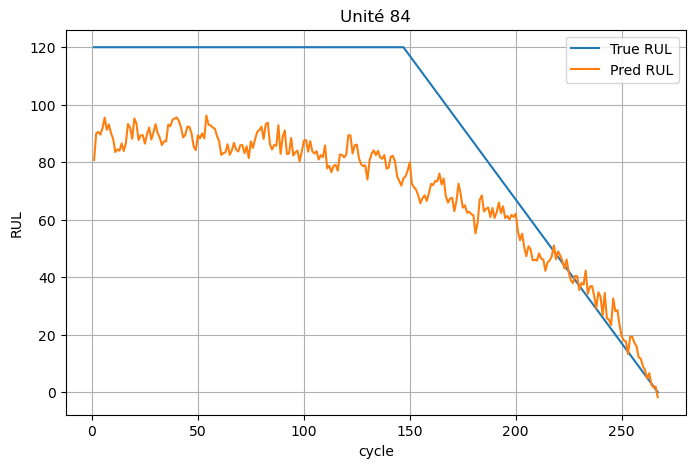

In [10]:
unit = test_units[0]

subset = test_df[test_df['unit_number']==unit]
X_u = subset.drop(columns=['unit_number','time_cycles','RUL'])
X_u_scaled = scaler.transform(X_u)
y_u = subset['RUL']

y_pred_u = lr.predict(X_u_scaled)

plt.figure(figsize=(8,5))
plt.plot(subset['time_cycles'], y_u, label='True RUL')
plt.plot(subset['time_cycles'], y_pred_u, label='Pred RUL')
plt.xlabel('cycle')
plt.ylabel('RUL')
plt.title(f'Unité {unit}')
plt.legend()
plt.grid()
plt.show()
plt.close()
